# Explorativna analýza

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = 20, 15

In [2]:
df = pd.read_csv("data/general_data.csv", index_col="EmployeeID")
df.EmployeeCount.value_counts()

1    4410
Name: EmployeeCount, dtype: int64

In [3]:
df.StandardHours.value_counts()

8    4410
Name: StandardHours, dtype: int64

In [4]:
df.drop(['EmployeeCount','StandardHours'],axis=1, inplace = True)
df.shape

(4410, 21)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,131160,1.0,Y,11,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,41890,0.0,Y,23,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,193280,1.0,Y,15,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,83210,3.0,Y,11,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,23420,4.0,Y,12,2,9.0,2,6,0,4


## Filtrovanie stĺpcov

In [6]:
num_cols = list(df.dtypes[df.dtypes != 'object'].index.values)
cat_cols = list(df.dtypes[df.dtypes == 'object'].index.values)

In [7]:
num_cols

['Age',
 'DistanceFromHome',
 'Education',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [8]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18']

## Filtrovanie číselných stĺpcov

In [9]:
df_numeric = df.loc[:, num_cols]
df['Attrition'] = df['Attrition'].astype('category')
df_numeric['Attrition_num'] = df.Attrition.cat.codes
df_numeric.shape

(4410, 14)

In [10]:
df_numeric.head()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num
EmployeeID,,,,,,,,,,,,,,
1,51,6,2,1,131160,1.0,11,0,1.0,6,1,0,0,0
2,31,10,1,1,41890,0.0,23,1,6.0,3,5,1,4,1
3,32,17,4,4,193280,1.0,15,3,5.0,2,5,0,3,0
4,38,2,5,3,83210,3.0,11,3,13.0,5,8,7,5,0
5,32,10,1,1,23420,4.0,12,2,9.0,2,6,0,4,0


In [11]:
df_numeric.columns

Index(['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_num'],
      dtype='object')

## Odstránenie NaN hodnôt

In [12]:
df_numeric.notna().all(axis=1)

EmployeeID
1        True
2        True
3        True
4        True
5        True
        ...  
4406     True
4407     True
4408     True
4409     True
4410    False
Length: 4410, dtype: bool

In [13]:
df_numeric = df_numeric.loc[df_numeric.notna().all(axis=1), :]
df_numeric.shape

(4382, 14)

## Korelácia

In [14]:
df_numeric.corr()['Attrition_num'].sort_values()

TotalWorkingYears         -0.169670
Age                       -0.158399
YearsWithCurrManager      -0.154692
YearsAtCompany            -0.133003
TrainingTimesLastYear     -0.047586
YearsSinceLastPromotion   -0.031423
MonthlyIncome             -0.030160
Education                 -0.017106
JobLevel                  -0.012382
DistanceFromHome          -0.009449
StockOptionLevel          -0.008164
PercentSalaryHike          0.033153
NumCompaniesWorked         0.042831
Attrition_num              1.000000
Name: Attrition_num, dtype: float64

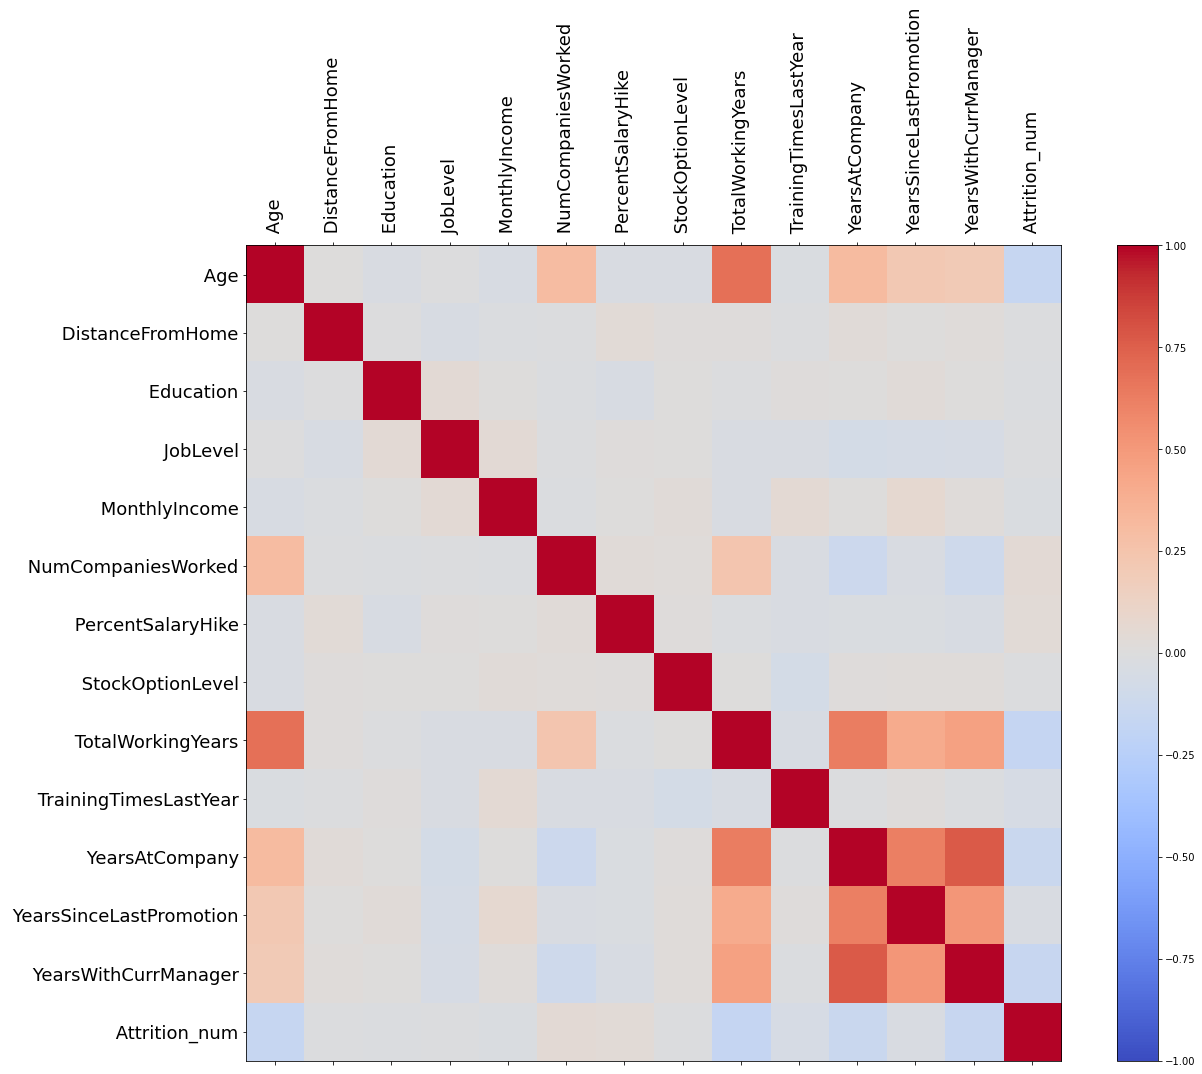

In [15]:
# Now we plot correlation of attributes
x = df_numeric
alpha = x.corr().columns
plt.rcParams["axes.grid"] = False

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)

plt.xticks(rotation='vertical')
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 18)

## Distribúcia dát

c:\users\michal_hucko\documents\tutorials\classification-sk\.env\classification\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>],
       [<AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>],
       [<AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:title={'center':'Attrition_num'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

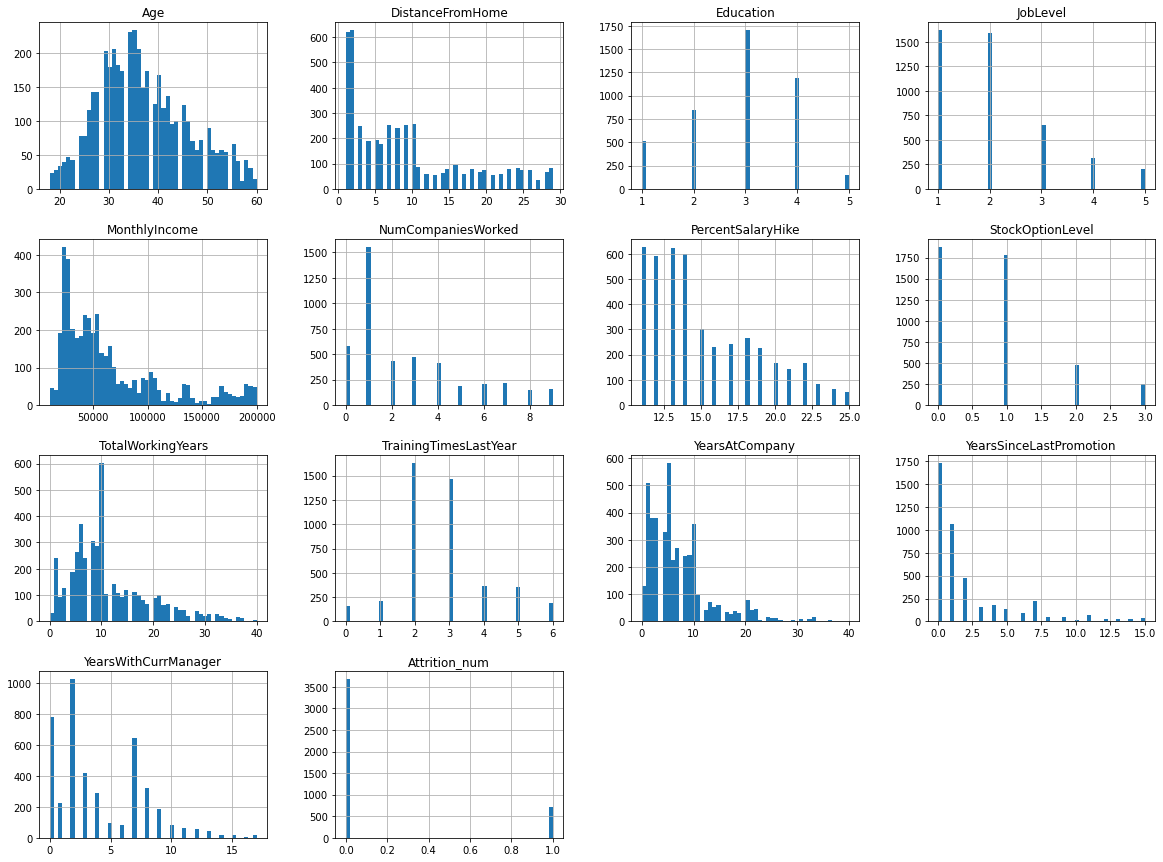

In [16]:
df_numeric.hist(bins=50)

## Pairplot

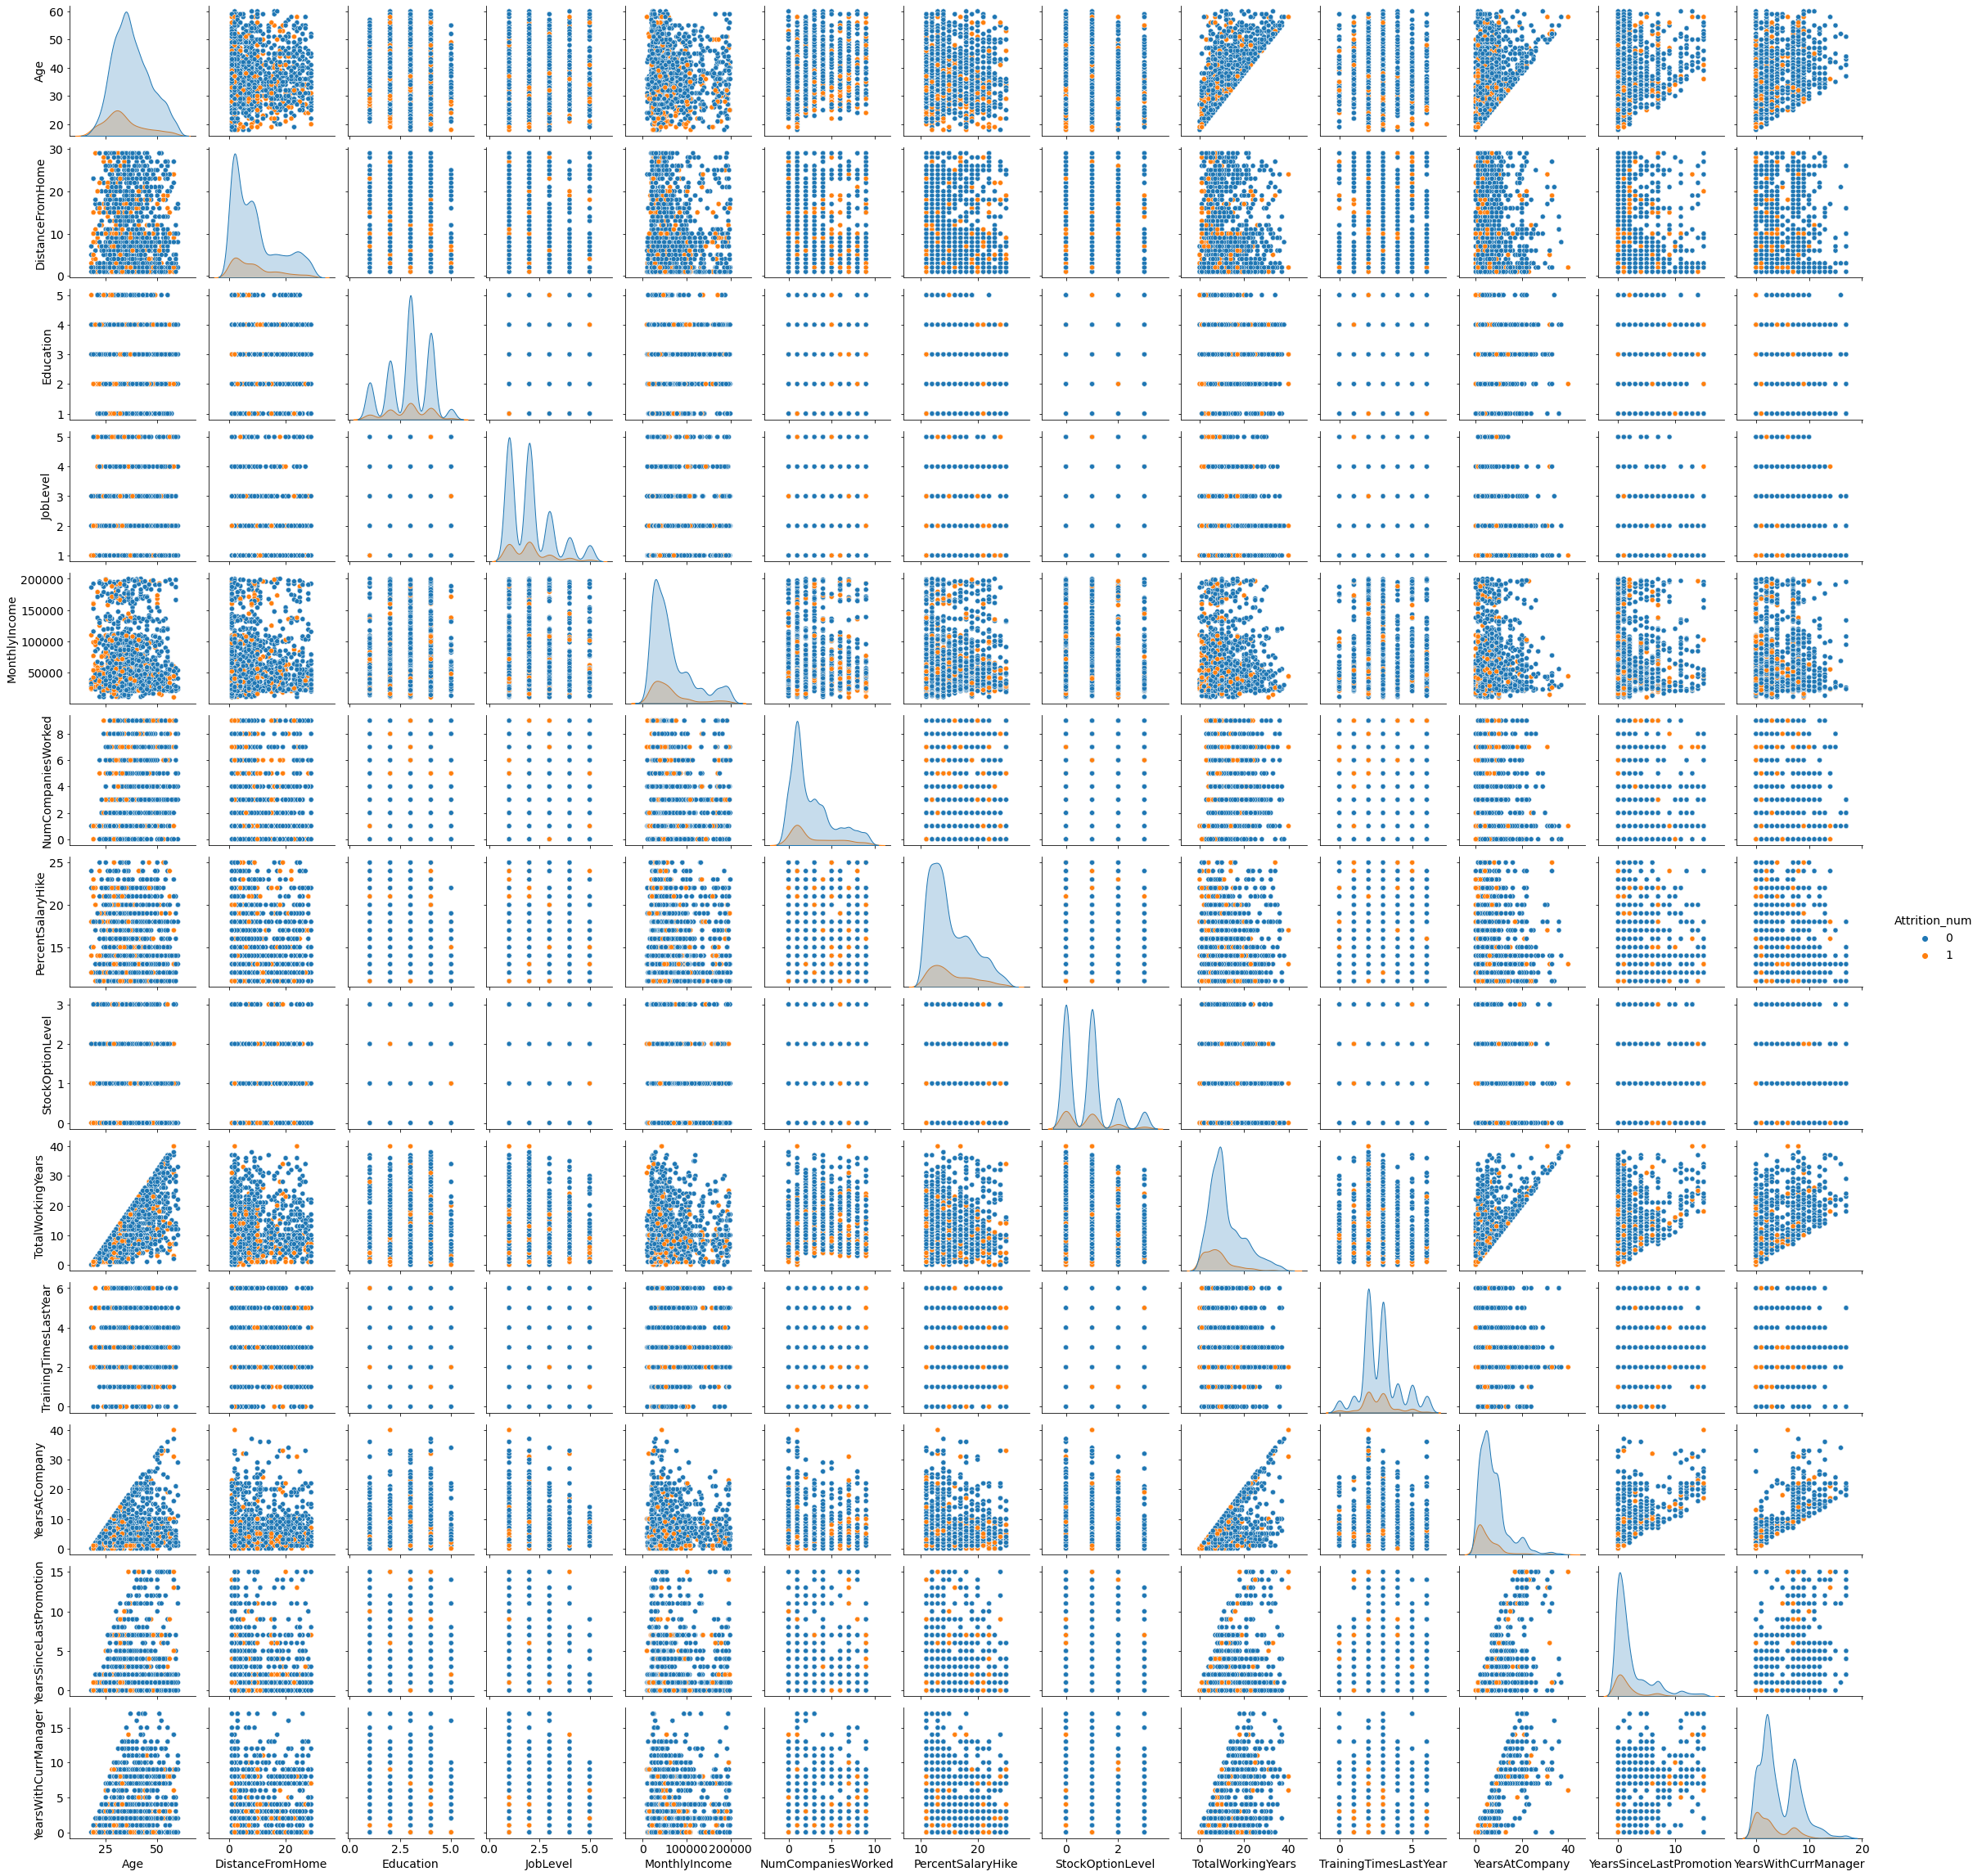

In [17]:
plt.rcParams['figure.figsize'] = 30, 25
dic = {"size": 14}
matplotlib.rc('font', **dic)

sns.pairplot(df_numeric, hue='Attrition_num', )

In [18]:
df_numeric.to_csv("processed_data/numerical.csv")